In [1]:
import os
import matplotlib.pyplot as plt               # create visualizations
import numpy as np                            # scientific comupting
import json                                   # JSON encoder and decoder
import glob
import time                                   # time assessment
import pandas as pd
import folium                                 # visualization
from folium import plugins                    # visualization
from folium.plugins import MiniMap, Draw, Search # visualization

from IPython.display import display           # visualization
pd.set_option('display.max_columns', None)
from datetime import date
from basemaps import basemaps


import ipywidgets
from IPython.display import display
# from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual, Layout
import ipywidgets as widgets


from sentinelsat import SentinelAPI, read_geojson, geojson_to_wkt
from datetime import date
import geopandas
import pandas as pd 
import datetime
import sentinel
import configparser

<h1> Credentials Configuration </h1>

In [2]:
### Parse the credentials ######
config = configparser.ConfigParser()
config.read('credentials.ini')

## Sentiinel - Open Acces Hub
username_scihub  = config['COPERNICUS']['username_scihub']  
password_scihub = config['COPERNICUS']['password_scihub'] 


In [3]:
print(password_earthexplorer)

54105410FF##



<h1> Select the Area of Interest </h1>


In [4]:
# create map
f = folium.Figure(height=500)
m = folium.Map(location=[38.237221, 22.612511], zoom_start=5, control_scale=True).add_to(f)

# add custom basemap
basemaps['Google Satellite Hybrid'].add_to(m)

# add a layer control panel to the map
m.add_child(folium.LayerControl())

# add minimap
m.add_child(MiniMap(tile_layer=basemaps['Google Satellite'], position='bottomright'))

# add draw control
draw = Draw(export=True, filename='AOI_manual_%s.geojson' % str(date.today()), draw_options={'polyline': False, 'circle': False, 'marker': False, 'circlemarker': False})
draw.add_to(m)

# display map
updater = display(f, display_id='m')

<h1> Select a Date Range </h1>

In [4]:

start_date = widgets.DatePicker(
    description='Start Sensing',
    disabled=False
)
end_date = widgets.DatePicker(
    description='End Sensing',
    disabled=False
)

instructions = ipywidgets.widgets.HTML('Define the sensing period time range:')
display(instructions)

widgets.HBox([start_date, end_date])



HTML(value='Define the sensing period time range:')

<h1> Search all available Sentinel Images (1,2,3) </h1>

In [5]:
# Search all available Sentinel Images (1,2,3)

start_date2 = str(start_date.value.year) + str(start_date.value.month) + str(start_date.value.day) 
end_date2 = str(end_date.value.year) + str(end_date.value.month) + str(end_date.value.day)


footprint = geojson_to_wkt(read_geojson('AOI_manual_%s.geojson' % str(date.today())))

df_s1 = sentinel.sentinel1(footprint, start_date2, end_date2)
df_s2 = sentinel.sentinel2(footprint, start_date2, end_date2)
# sentinel.sentinel3(footprint, start_date2, end_date2)



Sentinel 1 Products

The total number of found products: 30




In [6]:
df_s1

,Name,Sensing_month,Sensing_Day,Sensing_year,uuid,orbitdirection
0,S1B_IW_GRDH_1SDV_20180826T154902_20180826T1549...,8,26,2018,f9d2ae83-671e-4cba-a8be-ee004b0b648f,ASCENDING
1,S1A_IW_GRDH_1SDV_20180820T154927_20180820T1549...,8,20,2018,c4ed875f-409a-41c8-8569-09fb6ab3bed5,ASCENDING
2,S1B_IW_GRDH_1SDV_20180814T154901_20180814T1549...,8,14,2018,9259c936-1e76-43d2-9c6a-1b7ef24e4522,ASCENDING
3,S1A_IW_GRDH_1SDV_20180808T154926_20180808T1549...,8,8,2018,f4998bdb-b4c1-4a6d-b211-516a7a508ee9,ASCENDING
4,S1B_IW_GRDH_1SDV_20180802T154900_20180802T1549...,8,2,2018,9f3f32e5-dc37-4366-a482-b3ef313d7d34,ASCENDING
5,S1A_IW_GRDH_1SDV_20180727T154926_20180727T1549...,7,27,2018,bc102b49-c156-4edb-8d69-486be1ff87de,ASCENDING
6,S1B_IW_GRDH_1SDV_20180721T154900_20180721T1549...,7,21,2018,927ae71e-a294-4164-a37b-2cf236bc513f,ASCENDING
7,S1A_IW_GRDH_1SDV_20180715T154925_20180715T1549...,7,15,2018,8e388802-f8c4-4af1-8fa9-4bea6fbda59e,ASCENDING
8,S1B_IW_GRDH_1SDV_20180709T154859_20180709T1549...,7,9,2018,661ba163-b6e8-4d7c-a500-e6f297b8d60d,ASCENDING
9,S1A_IW_GRDH_1SDV_20180703T154924_20180703T1549...,7,3,2018,d54a5ffc-bcf5-4db3-8ed5-9be8a9dfe0e3,ASCENDING


In [7]:
df_s1.to_csv('Sentinel_1_orbit_160_2021.csv', index=False)

In [11]:
df_s2.to_csv('Sentinel_2_Orbit_21_Cloud15%.csv', index=False)

In [5]:
df_s2.head(20)

,Name,Sensing_month,Sensing_day,Sensing_year,Cloud_Cover,uuid
0,S2B_MSIL1C_20211224T083249_N0301_R021_T36SWD_2...,12,24,2021,0.9603,904828f2-5c6d-4c63-a484-4419ef40cc42
1,S2A_MSIL1C_20211209T083341_N0301_R021_T36SWD_2...,12,9,2021,2.8608,f8519d90-d036-4e33-8419-af2a427f4942
2,S2B_MSIL1C_20211124T083159_N0301_R021_T36SWD_2...,11,24,2021,2.0718,0cdedad9-e514-4188-b0a2-9a93c108ce9f
3,S2B_MSIL1C_20211104T083029_N0301_R021_T36SWD_2...,11,4,2021,0.0810,5688f664-f882-43f5-a116-c5f0d00275e0
4,S2B_MSIL1C_20211025T082929_N0301_R021_T36SWD_2...,10,25,2021,1.6930,9f6d2d3b-d7ee-40f7-9cec-b2ca6cd00b72
5,S2A_MSIL1C_20211020T082951_N0301_R021_T36SWD_2...,10,20,2021,5.5158,ecb0111e-f907-40de-bd2d-e447de29518f
6,S2B_MSIL1C_20211015T082829_N0301_R021_T36SWD_2...,10,15,2021,0.1401,3e72d882-aea4-4174-92f8-2f7eab864e2c
7,S2A_MSIL1C_20211010T082851_N0301_R021_T36SWD_2...,10,10,2021,0.0000,2322fd6b-11b3-4d76-8fc1-b721891dc59f
8,S2B_MSIL1C_20211005T082739_N0301_R021_T36SWD_2...,10,5,2021,0.0353,0f986c99-589a-476b-af69-c5020c3f72b7
9,S2A_MSIL1C_20210930T082741_N0301_R021_T36SWD_2...,9,30,2021,1.8574,cc4ca0a9-0e4b-4fc6-8763-52afb33322cf


<AxesSubplot:ylabel='Frequency'>

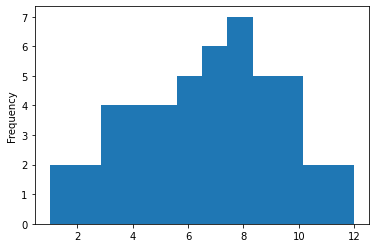

In [7]:
# Plot the frequency of sensing for Sentinel 1 and Sensintl 2

df_s2.Sensing_Date.plot.hist(bins=12)

<AxesSubplot:title={'center':'Frequency per month'}, ylabel='Frequency'>

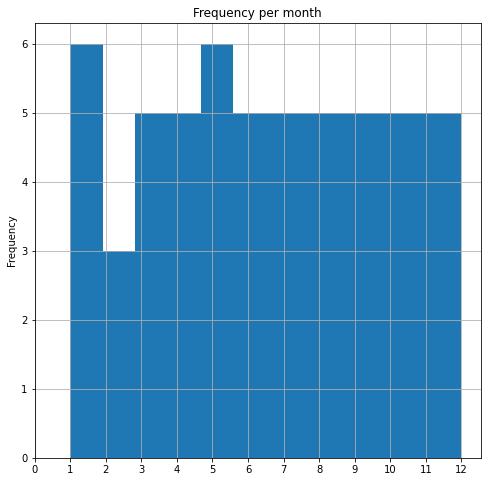

In [7]:
df_s1.Sensing_Date.plot.hist(bins=12, grid = 'True', xticks = [1,2,3,4,5,6,7,8,9,10,11,12], figsize = (8, 8), title = 'Frequency per month')

<h1> Download Sentinel Images </h1>

In [8]:
# Widget the user gives the name of the product


instructions = ipywidgets.widgets.HTML('Type the name of the product or unique identifier to download:')
display(instructions)

give_name_sentinel = widgets.Textarea(
    value='',
    placeholder='Type something',
    description='String:',
    disabled=False
)



widgets.HBox([give_name_sentinel])

HTML(value='Type the name of the product or unique identifier to download:')

In [11]:
from sentinelsat import SentinelAPI, read_geojson, geojson_to_wkt


# connect to the API
api = SentinelAPI(username_scihub, password_scihub, 'https://apihub.copernicus.eu/apihub')


product_info = api.get_product_odata(give_name_sentinel.value)
is_online = product_info['Online']
# or
is_online = api.is_online(give_name_sentinel.value)

if is_online:
    print('Product {} is online. Starting download.'.format(give_name_sentinel.value))
    api.download(give_name_sentinel.value)
else:
    print('Product {} is not online.\n'.format(give_name_sentinel.value))
    print('Pleas visit the Sentinel Open Hub and triger the product')

Product 0d6eef7d-fd0a-497e-8f3e-e1c11df4452b is not online.

Pleas visit the Sentinel Open Hub and triger the product
